# SubC-* Method Demonstration

In [3]:
from timeit import default_timer as timer
from datetime import datetime as date
from pathlib import Path
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle


import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.backends.cudnn as cudnn
import copy
import math
import torch.nn.functional as F

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics.cluster import adjusted_rand_score as ari_score
from typing import List
from tqdm.auto import tqdm

Importing the package main class, and the Normal Inverse Wishart (NIW) prior.

Follow the installation guide at: https://github.com/BGU-CS-VIL/DPMMPython before importing. Extra steps are required after `pip install`.

In [ ]:
from dpmmpython.dpmmwrapper import DPMMPython
from dpmmpython.priors import niw

import julia
from julia import Random
jl = julia.Julia()
jl.eval('Random.seed!(1)');

In [99]:
def plot_results(data, res_random, res_kmeans, res_splitnet):
    fig, ax = plt.subplots(2, 3, figsize=(12, 8), dpi=200)
    metrics = ["K", "nmi", "ari"]
    
    for i, metric in enumerate(metrics):
        vals_random = np.array(res_random[metric])
        vals_kmeans = np.array(res_kmeans[metric])
        vals_splitnet = np.array(res_splitnet[metric])
        
        ax[0, i].plot(np.arange(0, len(vals_random)), vals_random, label="Random")
        ax[0, i].plot(np.arange(0, len(vals_kmeans)), vals_kmeans, label="Kmeans")
        ax[0, i].plot(np.arange(0, len(vals_splitnet)), vals_splitnet, label="SplitNet")
        ax[0, i].set_title(f"{metric}")
        ax[0, i].legend()
    
    title = ["SubC-Random", "SubC-Kmeans", "SubC-SplitNet"]
    for i, labels in enumerate([res_random["y"], res_kmeans["y"], res_splitnet["y"]]):
        ax[1, i].scatter(data[0,:],data[1,:],c=labels, s=2, alpha=0.8, cmap="tab20")
        ax[1, i].set_title(f"{title[i]} Predictions")
    plt.show()

### Data Generation

We will use the package data generation function to generate some 2D data

In [102]:
D = 2 # Dimension
K = 20 # Number of Clusters
N = 20000 ##mber of points
var_scale = 30 # The variance of the MV-Normal distribution where the clusters means are sampled from.
data, labels = DPMMPython.generate_gaussian_data(N, D, K, var_scale)

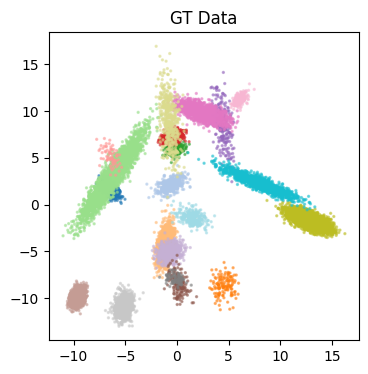

In [103]:
fig = plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(data[0,:],data[1,:],c=labels, s=2, alpha=0.5, cmap="tab20")
plt.title("GT Data")
plt.show()

# Fit DPGMM with the SubC-* Methods:

Fit the model and store the results in `results`.
When working from Jupyter Notebook/Lab you will not see Julia prints. However when running python from terminal you will see all the prints (as in the Julia packages)

In [105]:
alpha = 1000.0
burnout = 10
max_iters = 200
results_random = DPMMPython.fit(data,alpha, gt=labels, iterations=max_iters, burnout=burnout, verbose=False, init_type="none")
results_kmeans = DPMMPython.fit(data,alpha, gt=labels, iterations=max_iters, burnout=burnout, verbose=False, init_type="kmeans")
results_split = DPMMPython.fit(data, alpha, gt=labels, iterations=max_iters, burnout=burnout, verbose=False, init_type="splitnet_2d")

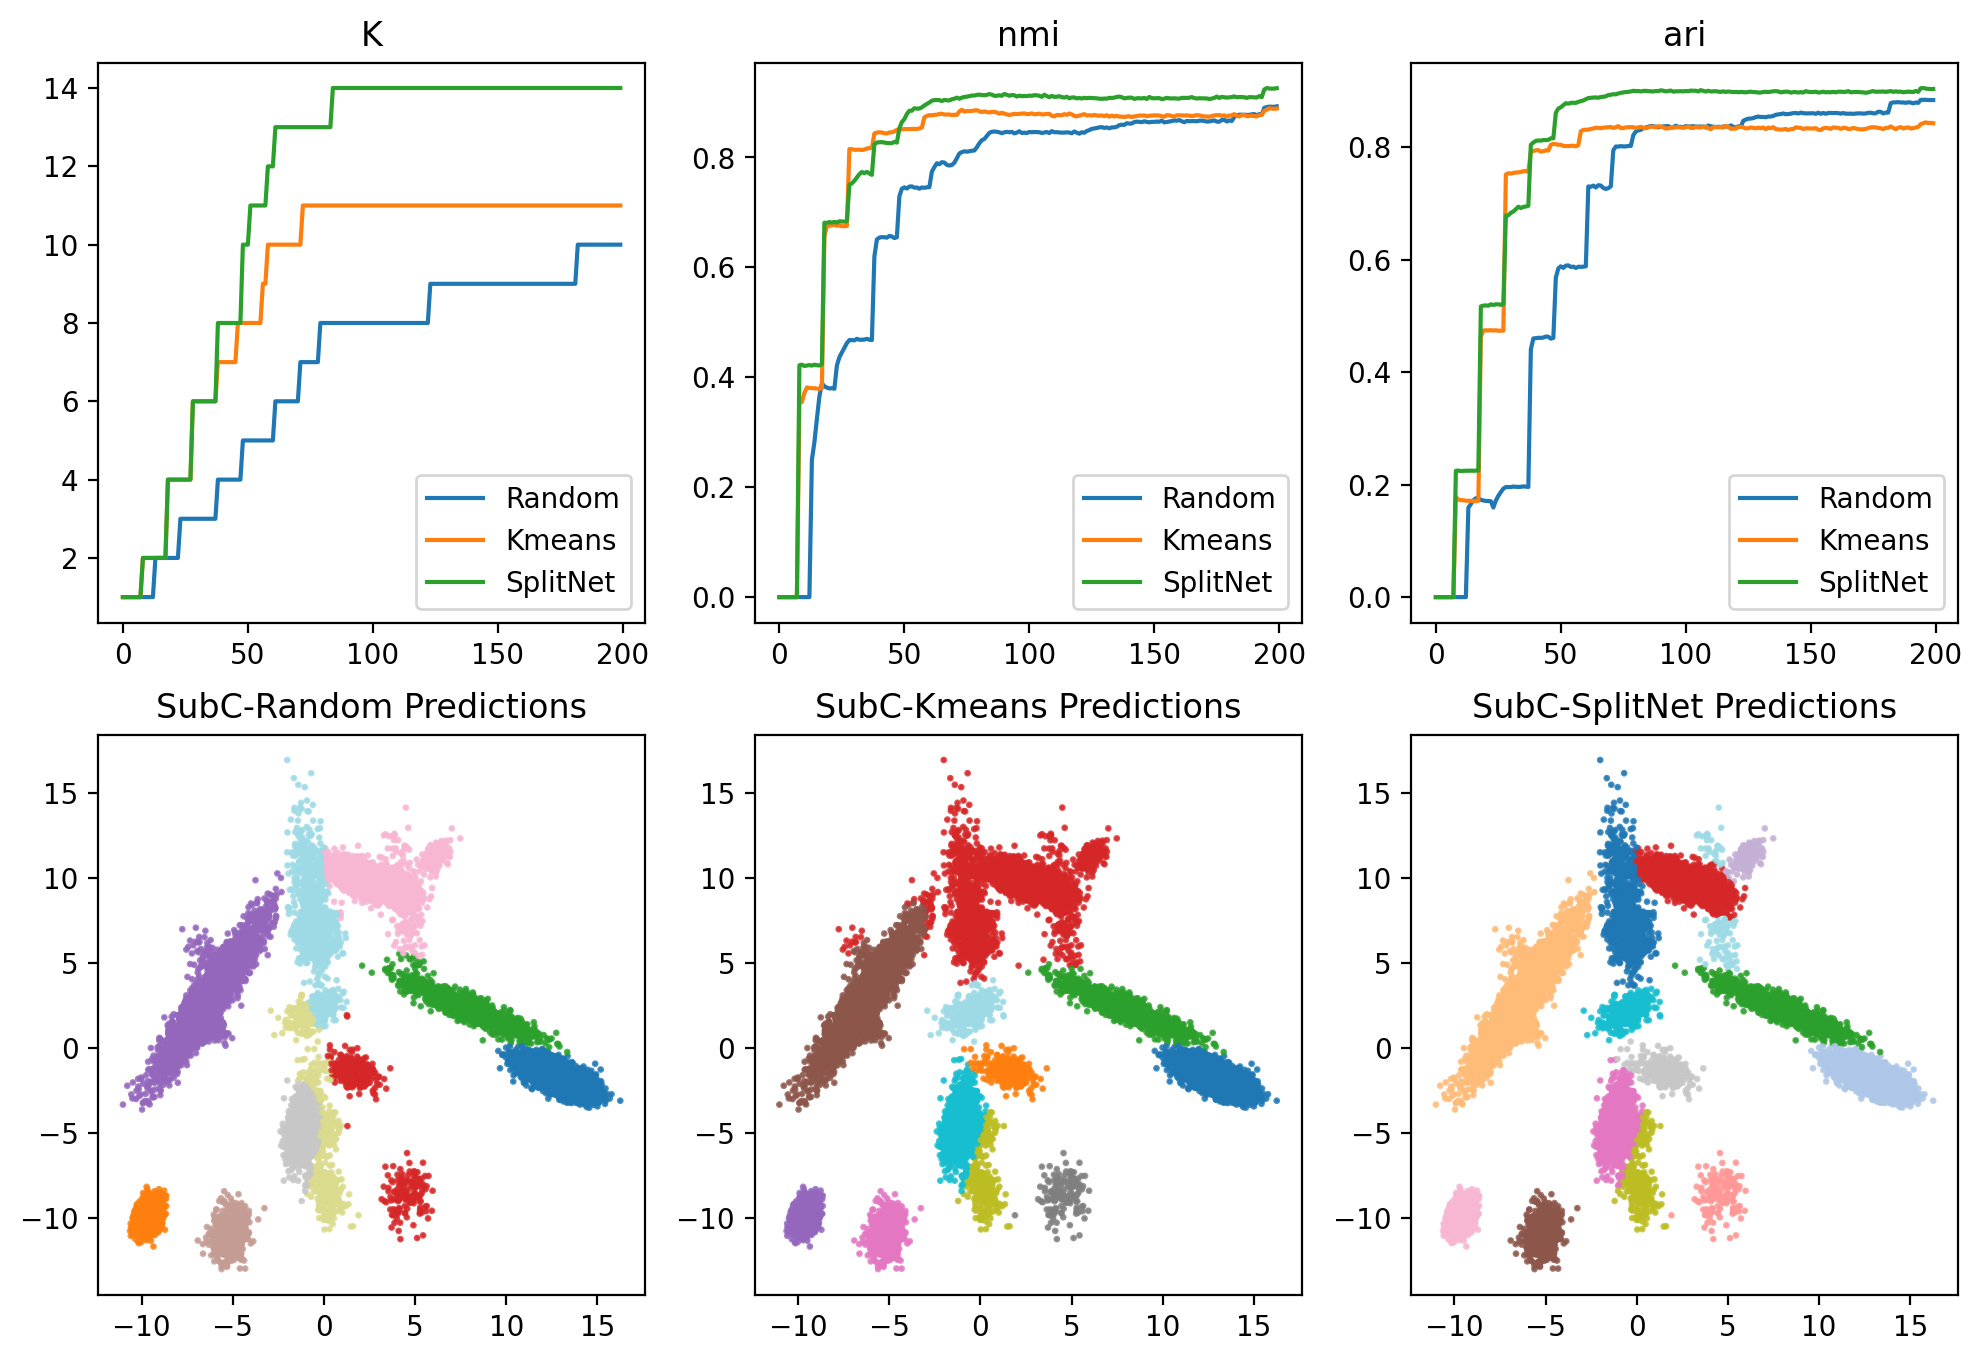

In [106]:
plot_results(data, results_random, results_kmeans, results_split)

# Another Example:

In [76]:
D = 2 # Dimension
K = 20 # Number of Clusters
N = 20000 ##mber of points
var_scale = 50 # The variance of the MV-Normal distribution where the clusters means are sampled from.
data, labels = DPMMPython.generate_gaussian_data(N, D, K, var_scale)
fig = plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(data[0,:],data[1,:],c=labels, s=2, alpha=0.5, cmap="tab20")
plt.title("GT Data")
plt.show()

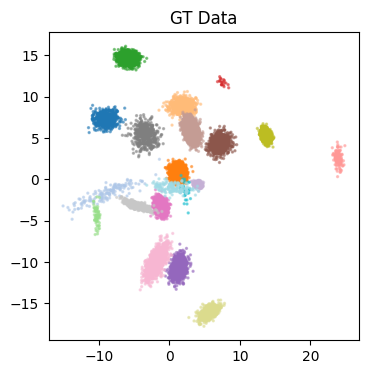

In [81]:
alpha = 1000.0
burnout = 10
max_iters = 200
results_random = DPMMPython.fit(data,alpha, gt=labels, iterations=max_iters, burnout=burnout, verbose=False, init_type="none")
results_kmeans = DPMMPython.fit(data,alpha, gt=labels, iterations=max_iters, burnout=burnout, verbose=False, init_type="kmeans")
results_split = DPMMPython.fit(data, alpha, gt=labels, iterations=max_iters, burnout=burnout, verbose=False, init_type="splitnet_2d")

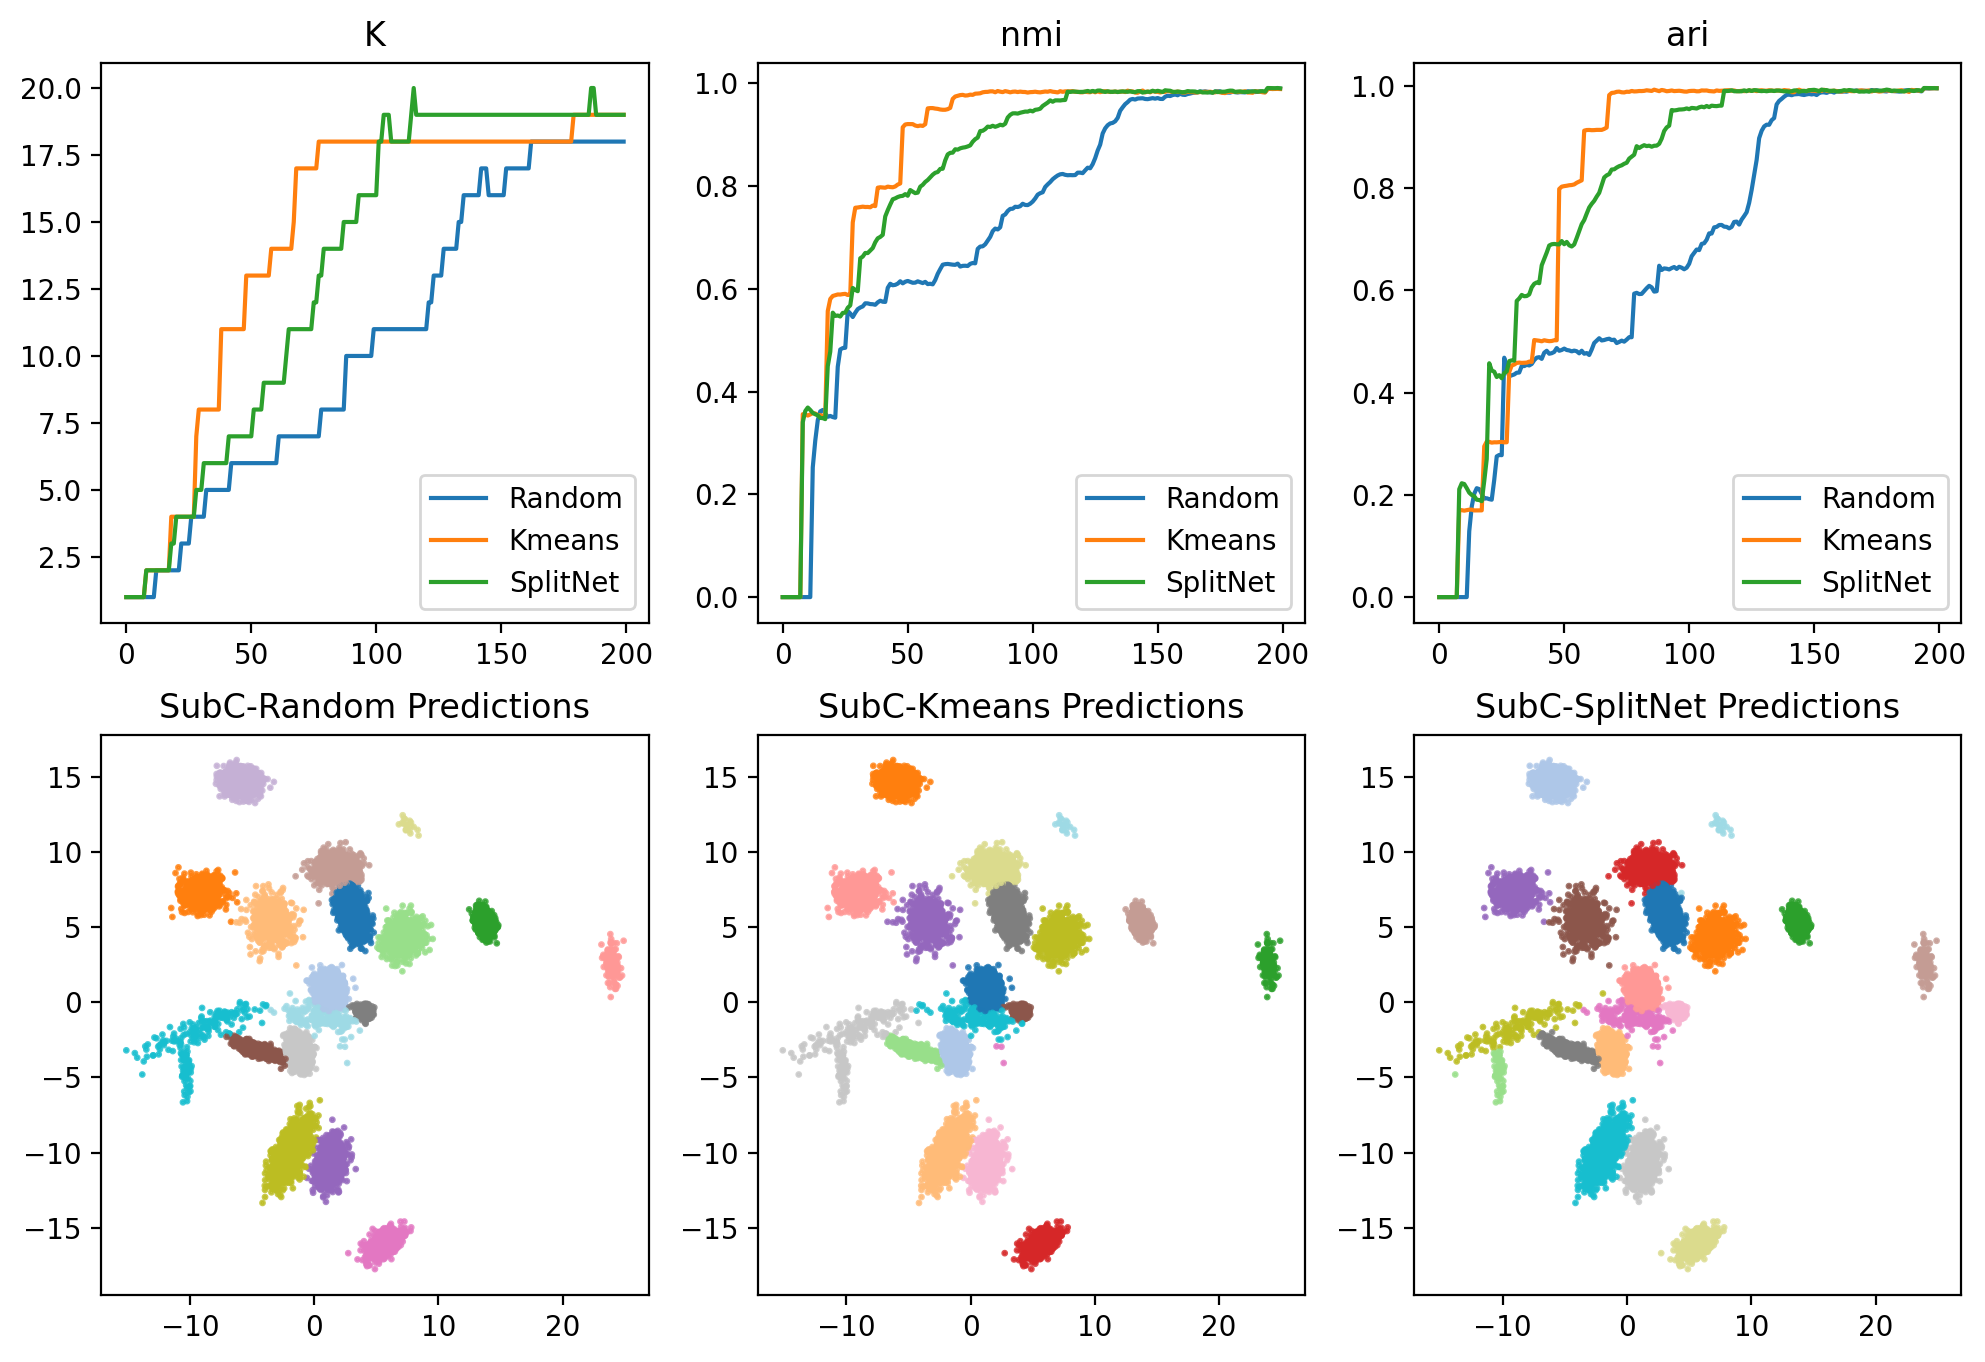

In [82]:
plot_results(data, results_random, results_kmeans, results_split)

# Yet another example:

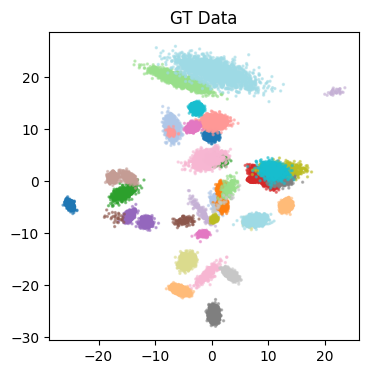

In [124]:
D = 2 # Dimension
K = 40 # Number of Clusters
N = 40000 ##mber of points
var_scale = 100 # The variance of the MV-Normal distribution where the clusters means are sampled from.
data, labels = DPMMPython.generate_gaussian_data(N, D, K, var_scale)
fig = plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(data[0,:],data[1,:],c=labels, s=2, alpha=0.5, cmap="tab20")
plt.title("GT Data")
plt.show()

In [125]:
alpha = 1000.0
burnout = 10
max_iters = 200
results_random = DPMMPython.fit(data,alpha, gt=labels, iterations=max_iters, burnout=burnout, verbose=False, init_type="none")
results_kmeans = DPMMPython.fit(data,alpha, gt=labels, iterations=max_iters, burnout=burnout, verbose=False, init_type="kmeans")
results_split = DPMMPython.fit(data, alpha, gt=labels, iterations=max_iters, burnout=burnout, verbose=False, init_type="splitnet_2d")

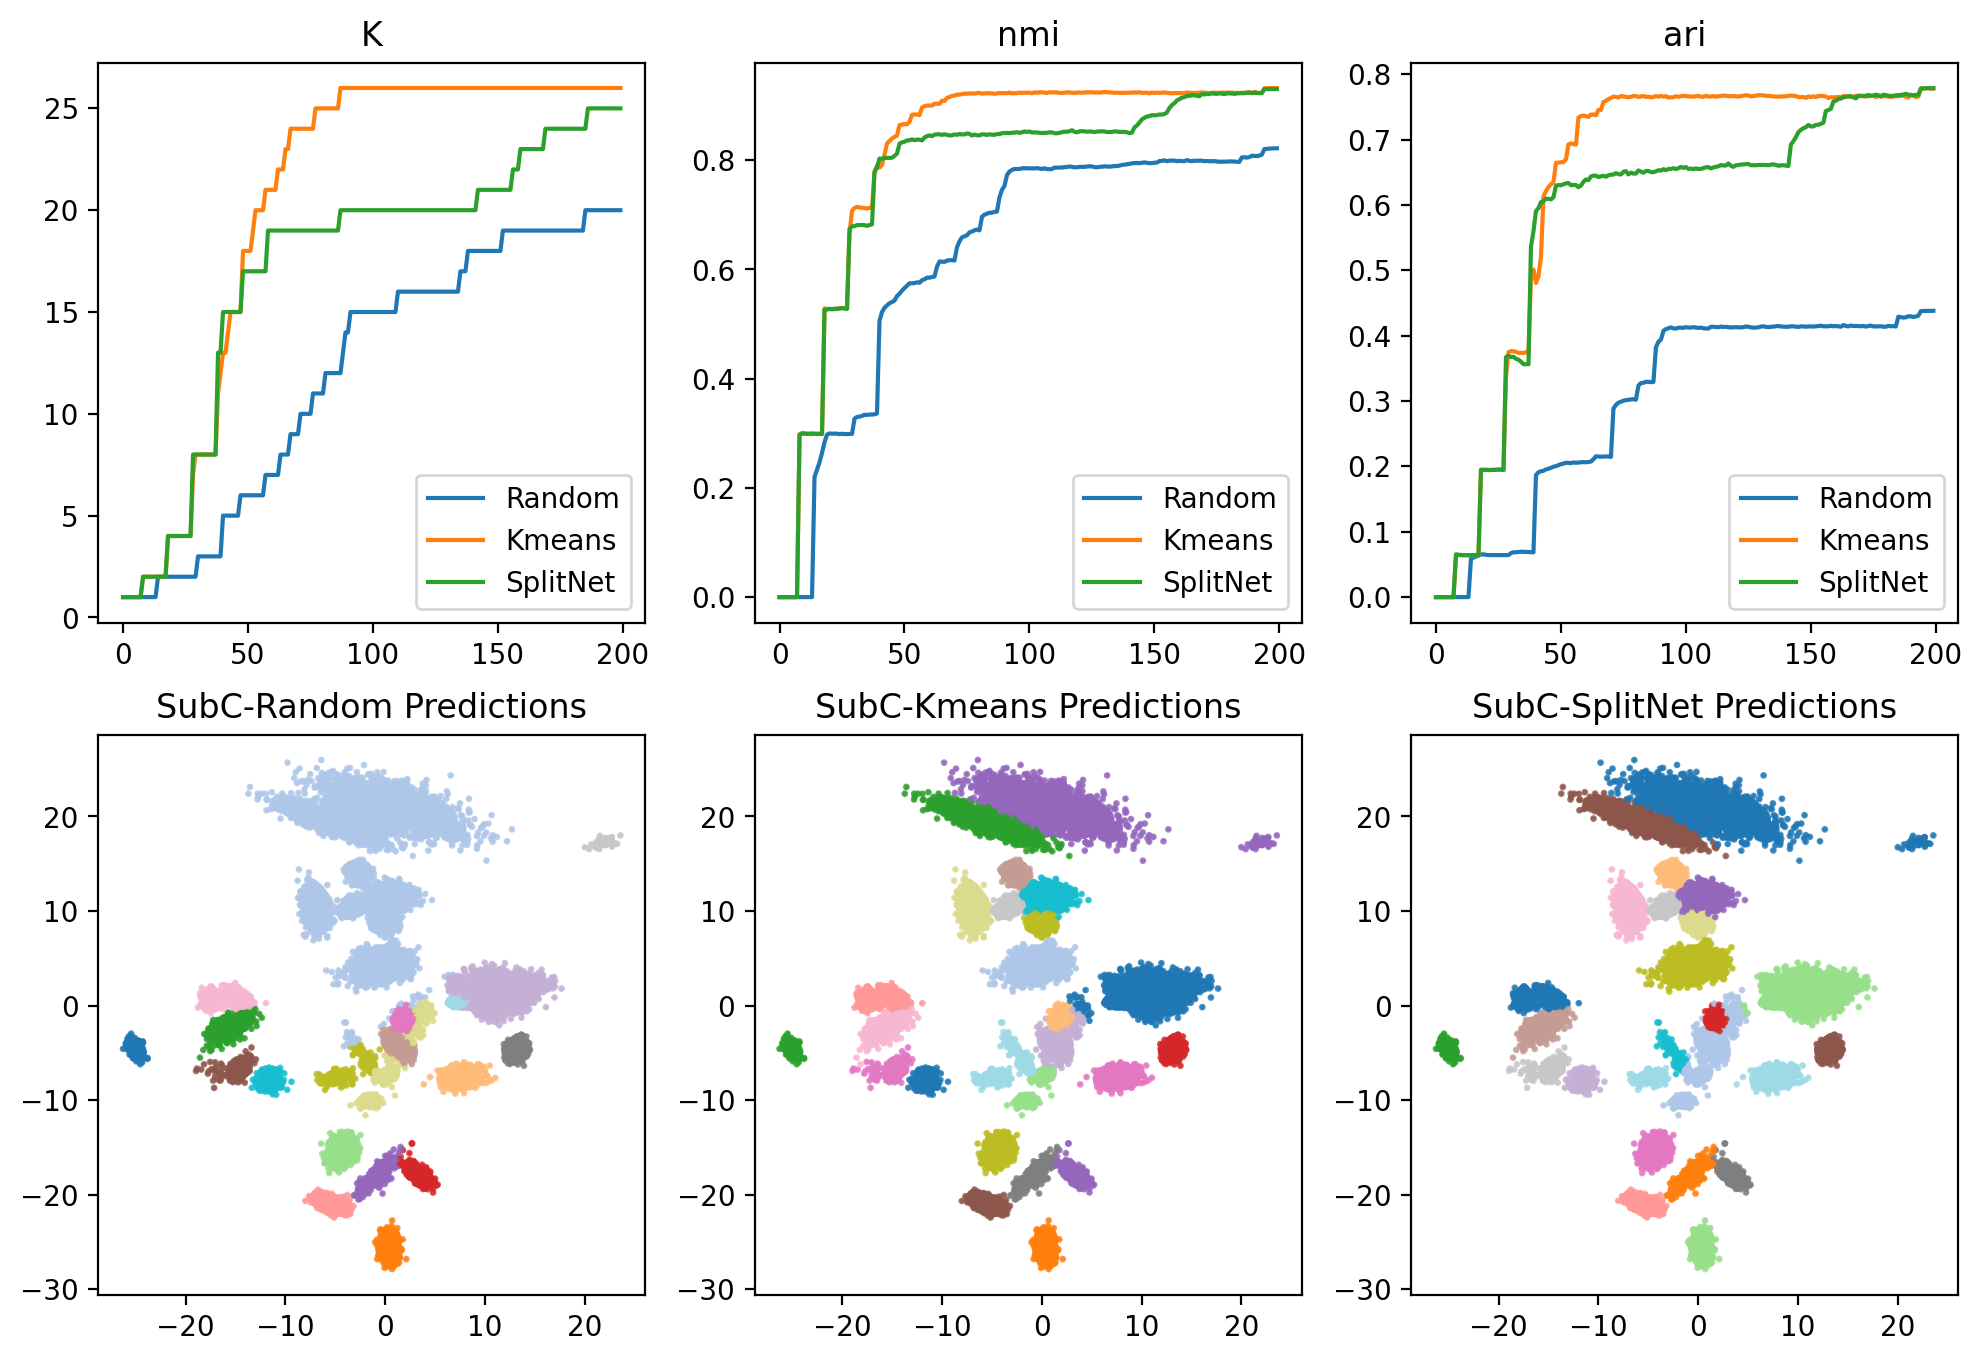

In [126]:
plot_results(data, results_random, results_kmeans, results_split)

# Yet another example:

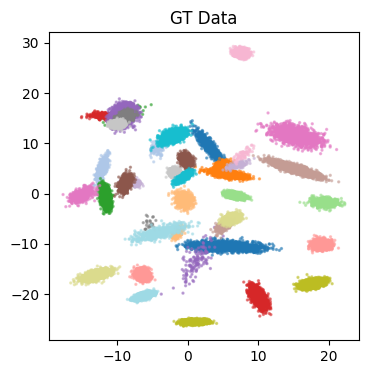

In [128]:
D = 2 # Dimension
K = 40 # Number of Clusters
N = 40000 ##mber of points
var_scale = 100 # The variance of the MV-Normal distribution where the clusters means are sampled from.
data, labels = DPMMPython.generate_gaussian_data(N, D, K, var_scale)
fig = plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(data[0,:],data[1,:],c=labels, s=2, alpha=0.5, cmap="tab20")
plt.title("GT Data")
plt.show()

In [131]:
alpha = 1000.0
burnout = 10
max_iters = 200
results_random = DPMMPython.fit(data,alpha, gt=labels, iterations=max_iters, burnout=burnout, verbose=False, init_type="none", init_clusters=1)
results_kmeans = DPMMPython.fit(data,alpha, gt=labels, iterations=max_iters, burnout=burnout, verbose=False, init_type="kmeans", init_clusters=1)
results_split = DPMMPython.fit(data, alpha, gt=labels, iterations=max_iters, burnout=burnout, verbose=False, init_type="splitnet_2d", init_clusters=1)

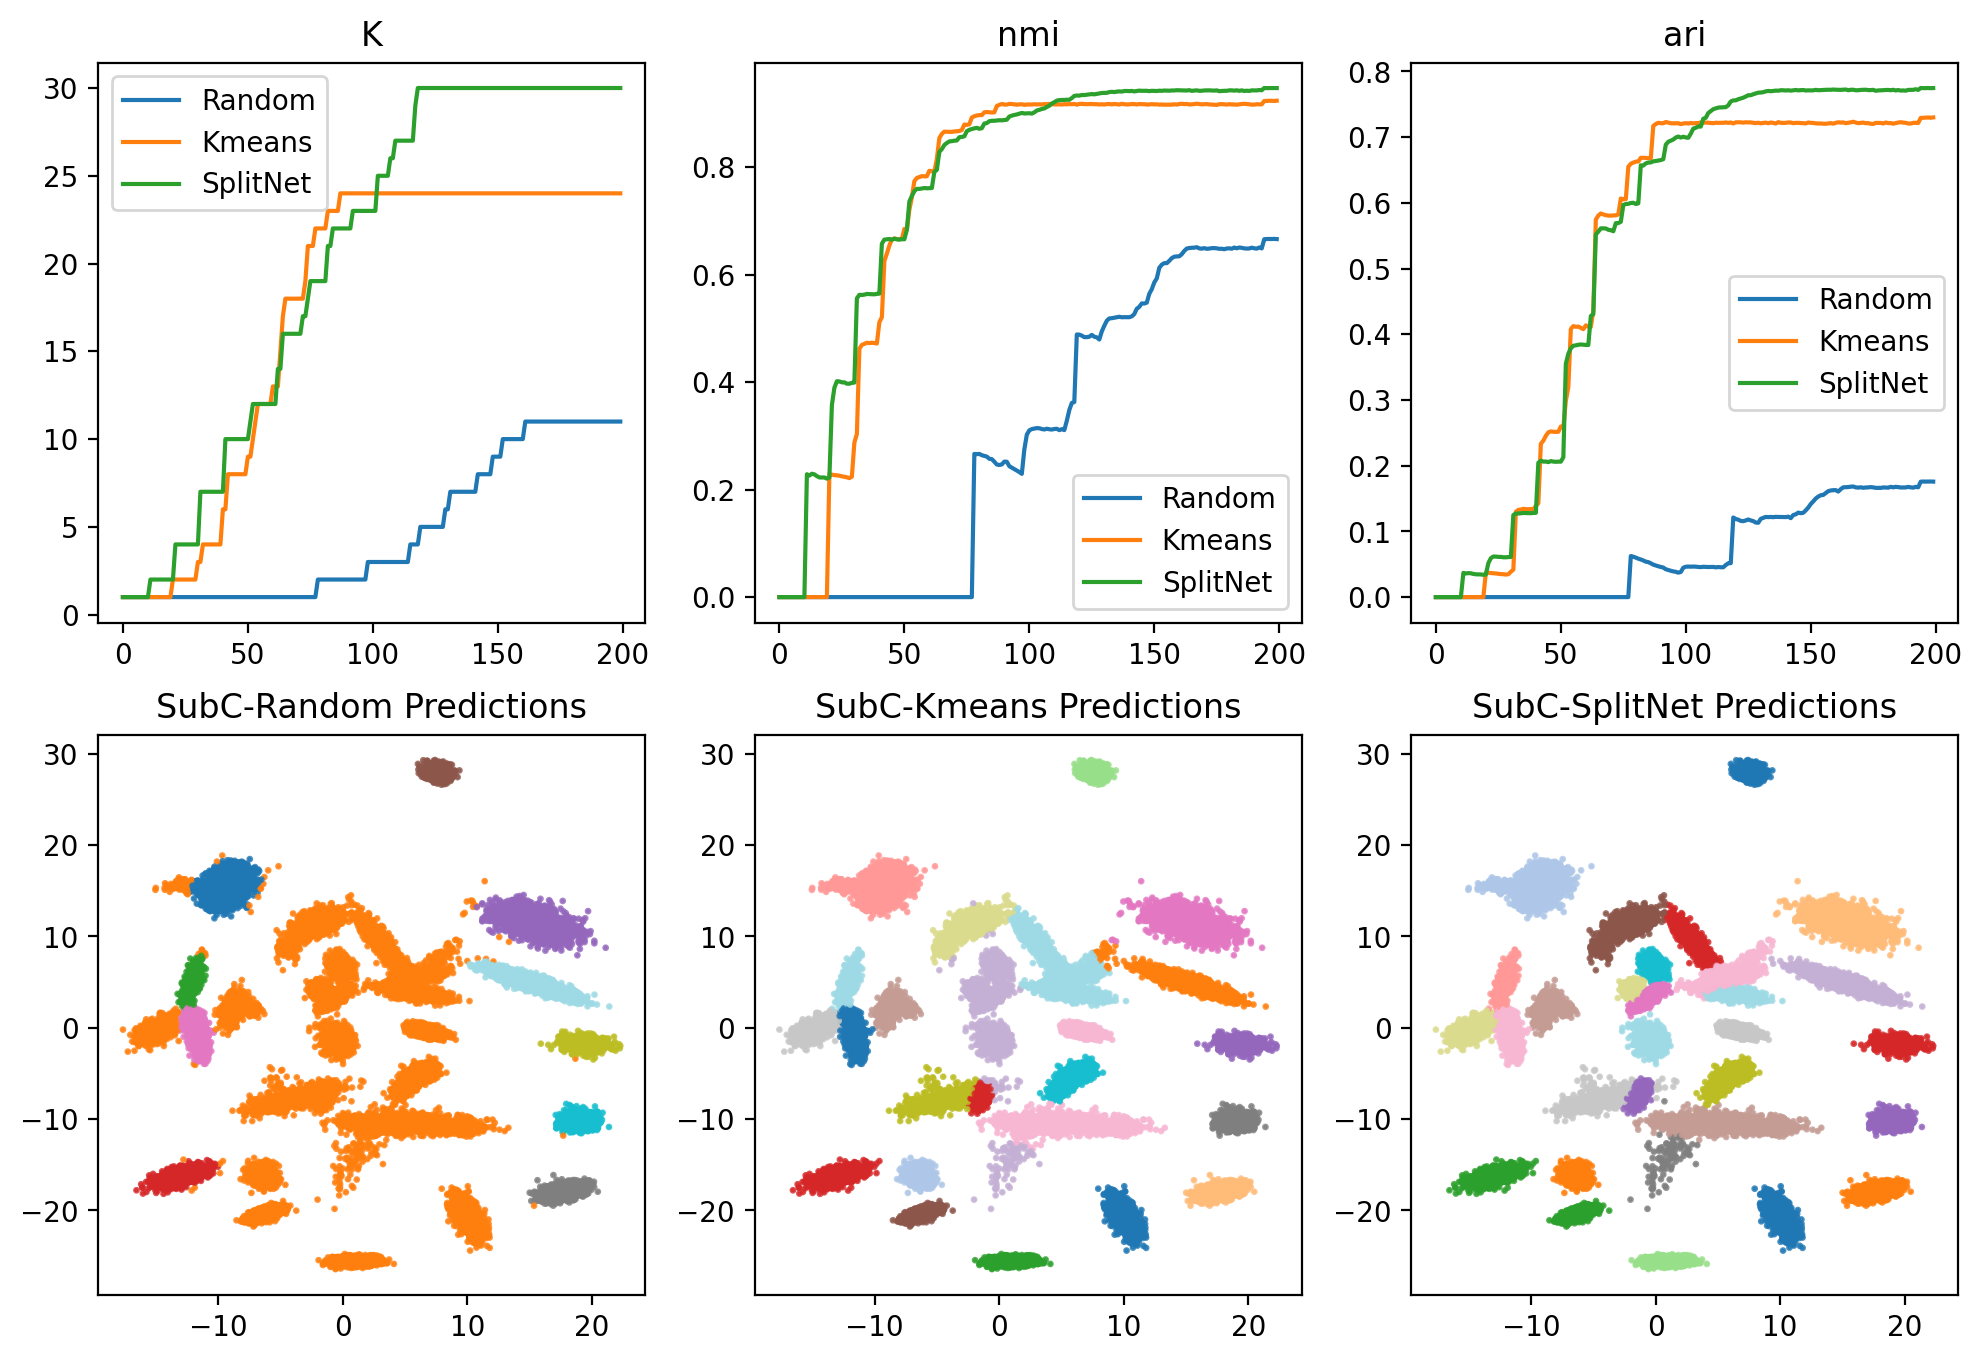

In [132]:
plot_results(data, results_random, results_kmeans, results_split)